In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# Load the dataset into dataframe
tweets_df = pd.read_csv('D:/development/yorkU/capstone/twitter_tweets.csv')
tweets_df.head()

,favourites_count,hashtags,id,latitude,longitude,mentions,reply_count,retweet_count,source,tweet_date,tweet_text,user_id
0,0,"['radiohumber', 'radiohumberalumni', 'radioper...",1110893589670834176,43.7166,-79.3407,"['RadioHumber', 'SudzFM']",0,0,Instagram,2019-03-27 13:17:25.839,*****LIVE from the 96.9 .@radiohumber studio.....,75846030
1,0,[],1110893591910645762,43.7166,-79.3407,[],0,0,Twitter for iPhone,2019-03-27 13:17:26.373,Hay gente que vive en el privilegio no les fa...,2721261928
2,0,[],1110893605441409024,43.7166,-79.3407,[],0,0,Twitter for Android,2019-03-27 13:17:29.599,Cograts my son!!!! :folded_hands_medium-dark_s...,289057332
3,0,[],1110893622524813312,43.7166,-79.3407,[],0,0,Twitter Web Client,2019-03-27 13:17:33.672,Salam from Montreal\nListening to the sweetest...,1291065301
4,0,[],1110893633639731200,43.7166,-79.3407,"['HumboldtBroncos', 'estevanbruins']",0,0,Twitter for iPhone,2019-03-27 13:17:36.322,The @HumboldtBroncos season came to an end las...,25366062


In [3]:
# number of rows and columns
tweets_df.shape

(315726, 12)

In [4]:
# changing tweet_date to DateTime column
tweets_df.tweet_date = pd.to_datetime(tweets_df['tweet_date'])
tweets_df.head()

,favourites_count,hashtags,id,latitude,longitude,mentions,reply_count,retweet_count,source,tweet_date,tweet_text,user_id
0,0,"['radiohumber', 'radiohumberalumni', 'radioper...",1110893589670834176,43.7166,-79.3407,"['RadioHumber', 'SudzFM']",0,0,Instagram,2019-03-27 13:17:25.839,*****LIVE from the 96.9 .@radiohumber studio.....,75846030
1,0,[],1110893591910645762,43.7166,-79.3407,[],0,0,Twitter for iPhone,2019-03-27 13:17:26.373,Hay gente que vive en el privilegio no les fa...,2721261928
2,0,[],1110893605441409024,43.7166,-79.3407,[],0,0,Twitter for Android,2019-03-27 13:17:29.599,Cograts my son!!!! :folded_hands_medium-dark_s...,289057332
3,0,[],1110893622524813312,43.7166,-79.3407,[],0,0,Twitter Web Client,2019-03-27 13:17:33.672,Salam from Montreal\nListening to the sweetest...,1291065301
4,0,[],1110893633639731200,43.7166,-79.3407,"['HumboldtBroncos', 'estevanbruins']",0,0,Twitter for iPhone,2019-03-27 13:17:36.322,The @HumboldtBroncos season came to an end las...,25366062


In [5]:
tweets_df.dtypes

favourites_count             int64
hashtags                    object
id                           int64
latitude                   float64
longitude                  float64
mentions                    object
reply_count                  int64
retweet_count                int64
source                      object
tweet_date          datetime64[ns]
tweet_text                  object
user_id                      int64
dtype: object

In [6]:
tweets_df['tweet_dt']= tweets_df['tweet_date'].dt.normalize()
# Number of Tweets by Day
tweets_day = tweets_df.groupby('tweet_dt')['id'].count()

In [7]:
tweets_day.head()

tweet_dt
2019-03-17     4875
2019-03-18    12606
2019-03-19    20581
2019-03-20    21585
2019-03-21     8662
Name: id, dtype: int64

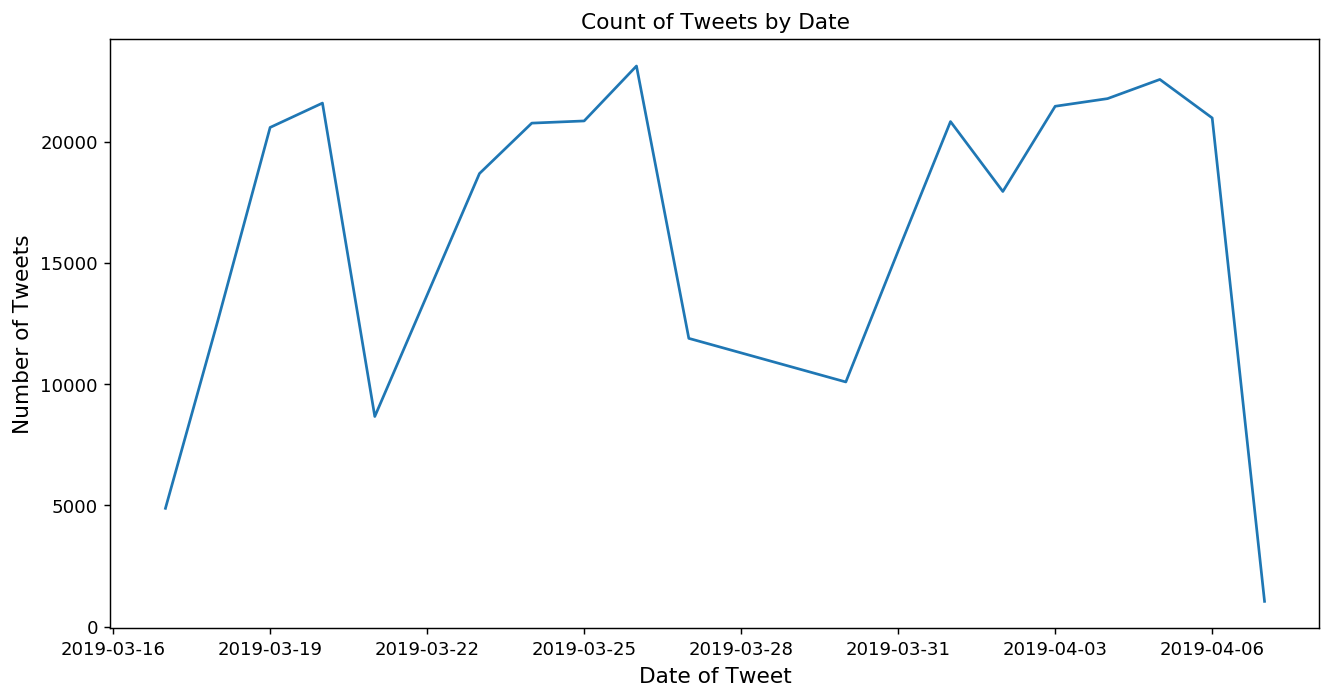

In [8]:
plt.figure(figsize=(12,6), dpi=130)

plt.xlabel('Date of Tweet', fontsize=12)

plt.ylabel('Number of Tweets', fontsize=12)

plt.title('Count of Tweets by Date')

plt.plot(tweets_day)

plt.show()

In [9]:
# Number of Tweets by Lat/Long
tweets_ll = tweets_df.groupby(['latitude', 'longitude'])['id'].count()

In [10]:
tweets_ll.head()

latitude    longitude  
-33.869994   151.218440    3
-33.469522  -70.658285     6
-6.252929    106.777773    8
 4.829314    7.015368      5
 9.637989   -13.560503     1
Name: id, dtype: int64

In [11]:
tweets_df['tweet_tm'] = pd.to_datetime(tweets_df['tweet_date'],format= '%H').dt.time
tweets_df['tweet_hour'] = tweets_df.tweet_date.dt.hour


In [12]:
# Number of Tweets by Time of Day
tweets_tod = tweets_df.groupby('tweet_hour')['id'].count()

In [13]:
tweets_tod.head()

tweet_hour
0    20194
1    20905
2    18674
3    14168
4     9570
Name: id, dtype: int64

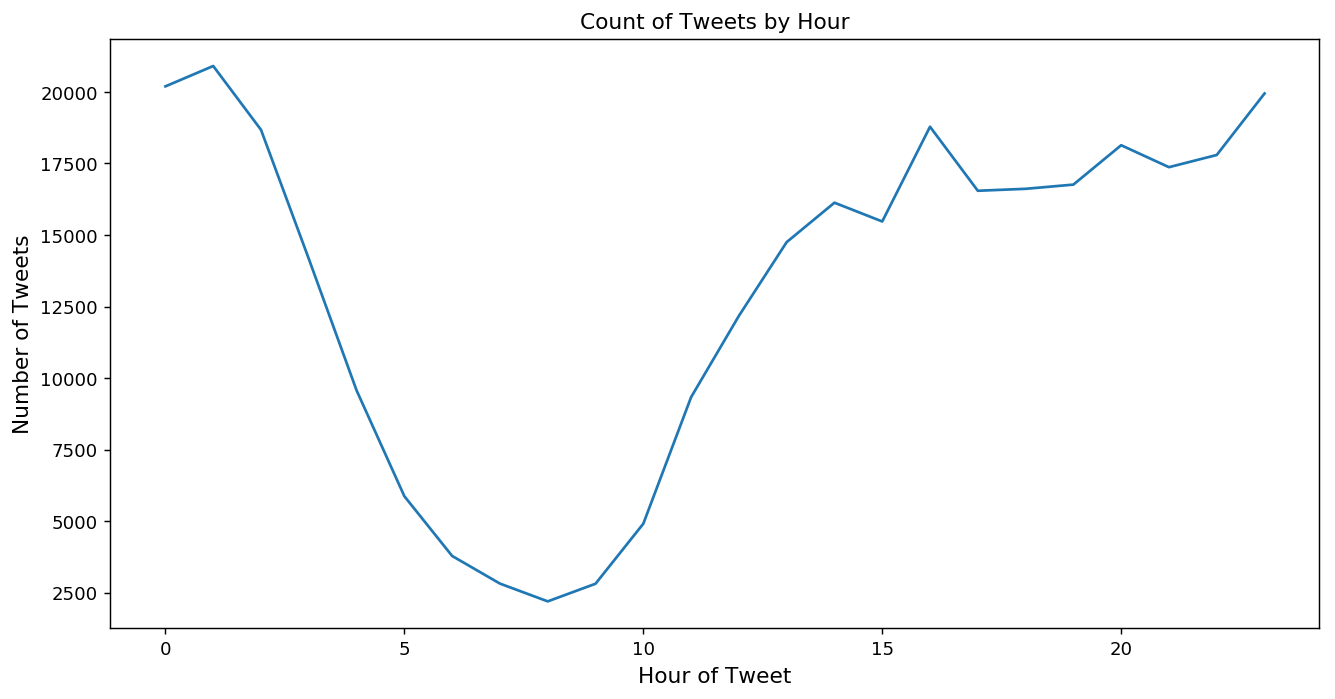

In [14]:
plt.figure(figsize=(12,6), dpi=130)

plt.xlabel('Hour of Tweet', fontsize=12)

plt.ylabel('Number of Tweets', fontsize=12)

plt.title('Count of Tweets by Hour')

plt.plot(tweets_tod)

plt.show()

In [15]:
tweets_df['tweet_dow'] = pd.to_datetime(tweets_df['tweet_date']).dt.dayofweek

In [16]:
# Number of Tweets by Day of Week
tweets_dow = tweets_df.groupby('tweet_dow')['id'].count()

In [17]:
tweets_dow.head()

tweet_dow
0    54278
1    61635
2    54923
3    30431
4    22560
Name: id, dtype: int64

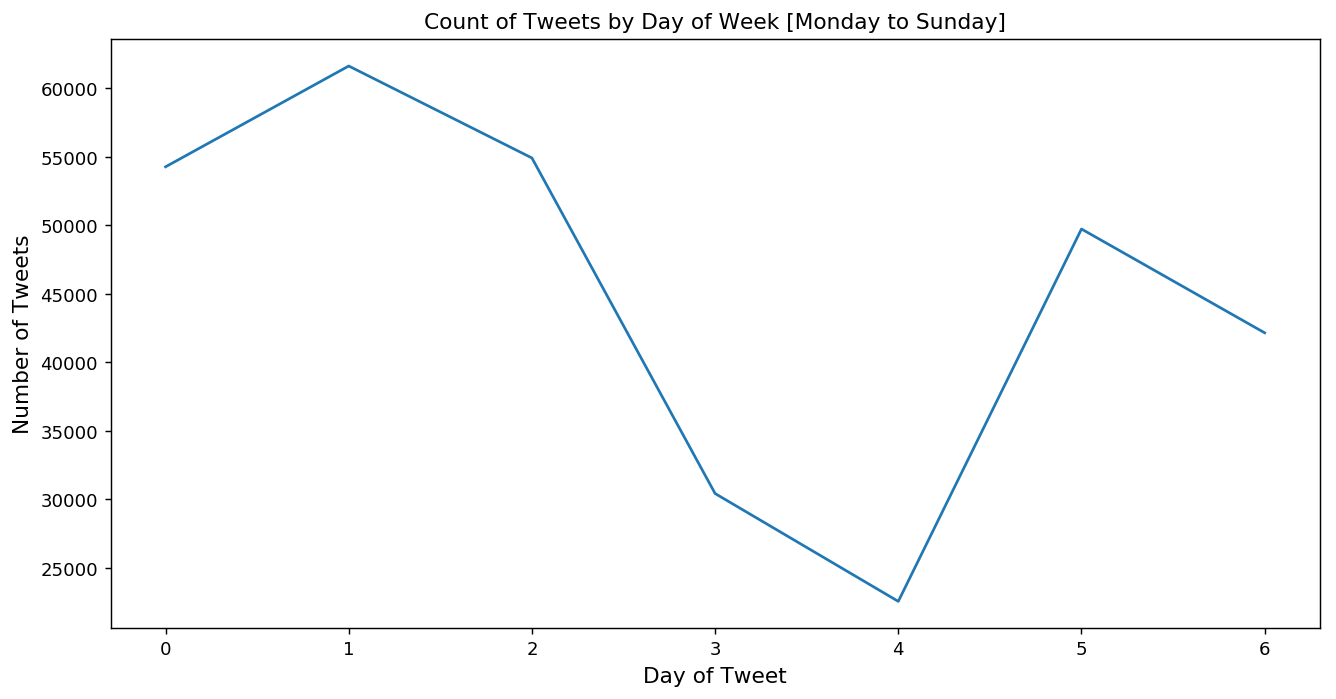

In [18]:
plt.figure(figsize=(12,6), dpi=130)

plt.xlabel('Day of Tweet', fontsize=12)

plt.ylabel('Number of Tweets', fontsize=12)

plt.title('Count of Tweets by Day of Week [Monday to Sunday]')

plt.plot(tweets_dow)

plt.show()

In [19]:
# Load the tweet users into dataframe
users_df = pd.read_csv('D:/development/yorkU/capstone/twitter_users.csv')
users_df.head()

,description,favourites_count,followers_count,friends_count,id,screen_name,user_name,verified
0,"Lawyer, toddler wrangler, women's advocate, po...",3354,3160,2893,3152354474,Lawsome_,Kathryn Marshall,False
1,Mental Resilience Expert; working with the per...,280,465,396,3308231090,mattcaldaroni,Matthew Caldaroni,False
2,"Product Management, Process Improvement, and B...",660,3224,726,16819900,bakevin,Kevin Brennan,False
3,"I adore my family, we all adore the Toronto Bl...",15241,6693,6680,24911291,glamourgirlca,Susan,False
4,I tweet when I remember,3092,302,260,21671136,outloudkat,kat abraham,False


In [20]:
# Join tweets with Users into one dataframe
twitter_df = pd.merge(tweets_df, users_df, left_on='user_id', right_on='id')
twitter_df.head()

,favourites_count_x,hashtags,id_x,latitude,longitude,mentions,reply_count,retweet_count,source,tweet_date,...,tweet_hour,tweet_dow,description,favourites_count_y,followers_count,friends_count,id_y,screen_name,user_name,verified
0,0,"['radiohumber', 'radiohumberalumni', 'radioper...",1110893589670834176,43.716600,-79.340700,"['RadioHumber', 'SudzFM']",0,0,Instagram,2019-03-27 13:17:25.839,...,13,2,"On-Air personality at 96.9 Radio Humber, Film ...",318,68,88,75846030,SudzFM,Sudz,False
1,0,['radiohumber'],1110916745370439680,43.716600,-79.340700,['DomaniqueGrant'],0,0,Instagram,2019-03-27 14:49:26.588,...,14,2,"On-Air personality at 96.9 Radio Humber, Film ...",318,68,88,75846030,SudzFM,Sudz,False
2,0,[],1113589945136902145,43.160000,-77.620000,"['BarillaGorilla', 'Sudzhole']",0,0,Twitter for Android,2019-04-03 23:51:47.078,...,23,2,"On-Air personality at 96.9 Radio Humber, Film ...",318,68,88,75846030,SudzFM,Sudz,False
3,0,[],1113928737920245760,43.658928,-79.348647,['MikaelaReavie'],0,0,Twitter for Android,2019-04-04 22:18:01.572,...,22,3,"On-Air personality at 96.9 Radio Humber, Film ...",318,68,88,75846030,SudzFM,Sudz,False
4,0,[],1113937300776411137,43.716600,-79.340700,['TamicaMarcano'],0,0,Twitter for Android,2019-04-04 22:52:03.116,...,22,3,"On-Air personality at 96.9 Radio Humber, Film ...",318,68,88,75846030,SudzFM,Sudz,False


In [21]:
twitter_df.shape

(301417, 24)

In [22]:
# Number of Tweets by User
tweets_users = twitter_df.groupby('screen_name')['id_x'].count() \
.reset_index(name='count') \
.sort_values(['count'], ascending=False)

In [23]:
tweets_users.head()

,screen_name,count
30339,tofire,2383
29337,sunowos,2263
178,511NY,2183
2128,BrendaLeeNY,1528
21428,gleexhy,1382


In [24]:
import nltk

In [25]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jennifer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
import string

In [27]:
translator = str.maketrans('', '', string.punctuation)

In [28]:
# Remove punctuation from tweet text
tweets_df['tweet_clean'] = tweets_df['tweet_text'].str.translate(translator)

In [29]:
# lower case and split words
tweets_df['tweet_clean'] = tweets_df['tweet_clean'].str.lower().str.split()

In [30]:
tweets_df.head()

,favourites_count,hashtags,id,latitude,longitude,mentions,reply_count,retweet_count,source,tweet_date,tweet_text,user_id,tweet_dt,tweet_tm,tweet_hour,tweet_dow,tweet_clean
0,0,"['radiohumber', 'radiohumberalumni', 'radioper...",1110893589670834176,43.7166,-79.3407,"['RadioHumber', 'SudzFM']",0,0,Instagram,2019-03-27 13:17:25.839,*****LIVE from the 96.9 .@radiohumber studio.....,75846030,2019-03-27,13:17:25.839000,13,2,"[live, from, the, 969, radiohumber, studio, su..."
1,0,[],1110893591910645762,43.7166,-79.3407,[],0,0,Twitter for iPhone,2019-03-27 13:17:26.373,Hay gente que vive en el privilegio no les fa...,2721261928,2019-03-27,13:17:26.373000,13,2,"[hay, gente, que, vive, en, el, privilegio, no..."
2,0,[],1110893605441409024,43.7166,-79.3407,[],0,0,Twitter for Android,2019-03-27 13:17:29.599,Cograts my son!!!! :folded_hands_medium-dark_s...,289057332,2019-03-27,13:17:29.599000,13,2,"[cograts, my, son, foldedhandsmediumdarkskinto..."
3,0,[],1110893622524813312,43.7166,-79.3407,[],0,0,Twitter Web Client,2019-03-27 13:17:33.672,Salam from Montreal\nListening to the sweetest...,1291065301,2019-03-27,13:17:33.672000,13,2,"[salam, from, montreal, listening, to, the, sw..."
4,0,[],1110893633639731200,43.7166,-79.3407,"['HumboldtBroncos', 'estevanbruins']",0,0,Twitter for iPhone,2019-03-27 13:17:36.322,The @HumboldtBroncos season came to an end las...,25366062,2019-03-27,13:17:36.322000,13,2,"[the, humboldtbroncos, season, came, to, an, e..."


In [31]:
from nltk.corpus import stopwords
stop_en = stopwords.words("english")

In [32]:
tweets_df['tweet_clean'] = tweets_df['tweet_clean'].apply(lambda x: [item for item in x if item not in stop_en])

In [33]:
tweets_df.head()

,favourites_count,hashtags,id,latitude,longitude,mentions,reply_count,retweet_count,source,tweet_date,tweet_text,user_id,tweet_dt,tweet_tm,tweet_hour,tweet_dow,tweet_clean
0,0,"['radiohumber', 'radiohumberalumni', 'radioper...",1110893589670834176,43.7166,-79.3407,"['RadioHumber', 'SudzFM']",0,0,Instagram,2019-03-27 13:17:25.839,*****LIVE from the 96.9 .@radiohumber studio.....,75846030,2019-03-27,13:17:25.839000,13,2,"[live, 969, radiohumber, studio, sudzfm, radio..."
1,0,[],1110893591910645762,43.7166,-79.3407,[],0,0,Twitter for iPhone,2019-03-27 13:17:26.373,Hay gente que vive en el privilegio no les fa...,2721261928,2019-03-27,13:17:26.373000,13,2,"[hay, gente, que, vive, en, el, privilegio, le..."
2,0,[],1110893605441409024,43.7166,-79.3407,[],0,0,Twitter for Android,2019-03-27 13:17:29.599,Cograts my son!!!! :folded_hands_medium-dark_s...,289057332,2019-03-27,13:17:29.599000,13,2,"[cograts, son, foldedhandsmediumdarkskintone, ..."
3,0,[],1110893622524813312,43.7166,-79.3407,[],0,0,Twitter Web Client,2019-03-27 13:17:33.672,Salam from Montreal\nListening to the sweetest...,1291065301,2019-03-27,13:17:33.672000,13,2,"[salam, montreal, listening, sweetest, eman, a..."
4,0,[],1110893633639731200,43.7166,-79.3407,"['HumboldtBroncos', 'estevanbruins']",0,0,Twitter for iPhone,2019-03-27 13:17:36.322,The @HumboldtBroncos season came to an end las...,25366062,2019-03-27,13:17:36.322000,13,2,"[humboldtbroncos, season, came, end, last, nig..."


In [35]:
tweets_df['test_tweet'] = tweets_df['tweet_clean'].apply(' '.join)

In [36]:
tweets_df.head()

,favourites_count,hashtags,id,latitude,longitude,mentions,reply_count,retweet_count,source,tweet_date,tweet_text,user_id,tweet_dt,tweet_tm,tweet_hour,tweet_dow,tweet_clean,test_tweet
0,0,"['radiohumber', 'radiohumberalumni', 'radioper...",1110893589670834176,43.7166,-79.3407,"['RadioHumber', 'SudzFM']",0,0,Instagram,2019-03-27 13:17:25.839,*****LIVE from the 96.9 .@radiohumber studio.....,75846030,2019-03-27,13:17:25.839000,13,2,"[live, 969, radiohumber, studio, sudzfm, radio...",live 969 radiohumber studio sudzfm radiohumber...
1,0,[],1110893591910645762,43.7166,-79.3407,[],0,0,Twitter for iPhone,2019-03-27 13:17:26.373,Hay gente que vive en el privilegio no les fa...,2721261928,2019-03-27,13:17:26.373000,13,2,"[hay, gente, que, vive, en, el, privilegio, le...",hay gente que vive en el privilegio les falta ...
2,0,[],1110893605441409024,43.7166,-79.3407,[],0,0,Twitter for Android,2019-03-27 13:17:29.599,Cograts my son!!!! :folded_hands_medium-dark_s...,289057332,2019-03-27,13:17:29.599000,13,2,"[cograts, son, foldedhandsmediumdarkskintone, ...",cograts son foldedhandsmediumdarkskintone proud
3,0,[],1110893622524813312,43.7166,-79.3407,[],0,0,Twitter Web Client,2019-03-27 13:17:33.672,Salam from Montreal\nListening to the sweetest...,1291065301,2019-03-27,13:17:33.672000,13,2,"[salam, montreal, listening, sweetest, eman, a...",salam montreal listening sweetest eman afroz s...
4,0,[],1110893633639731200,43.7166,-79.3407,"['HumboldtBroncos', 'estevanbruins']",0,0,Twitter for iPhone,2019-03-27 13:17:36.322,The @HumboldtBroncos season came to an end las...,25366062,2019-03-27,13:17:36.322000,13,2,"[humboldtbroncos, season, came, end, last, nig...",humboldtbroncos season came end last night 32 ...


In [37]:
from wordcloud import WordCloud

In [38]:
all_words = ' '.join([text for text in tweets_df['test_tweet']])

In [109]:
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(all_words)

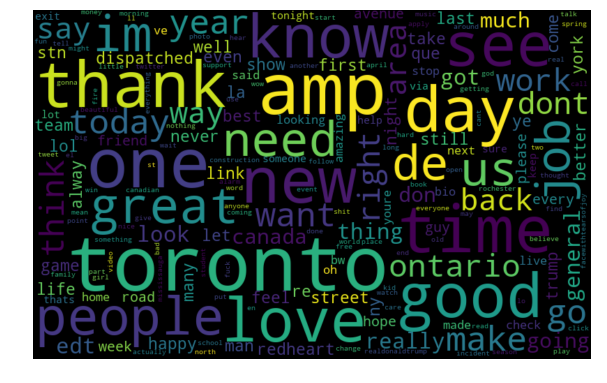

In [110]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
from textblob import TextBlob

In [47]:
tweets_df['sentiment'] = tweets_df['test_tweet'].apply(lambda tweet: TextBlob(tweet).sentiment)

In [101]:
tweets_df.head()

,favourites_count,hashtags,id,latitude,longitude,mentions,reply_count,retweet_count,source,tweet_date,...,tweet_tm,tweet_hour,tweet_dow,tweet_clean,test_tweet,sentiment,polarity,subjectivity,word_counts,hash
0,0,"[radiohumber, radiohumberalumni, radiopersonal...",1110893589670834176,43.7166,-79.3407,"['RadioHumber', 'SudzFM']",0,0,Instagram,2019-03-27 13:17:25.839,...,13:17:25.839000,13,2,"[live, 969, radiohumber, studio, sudzfm, radio...",live 969 radiohumber studio sudzfm radiohumber...,"(0.13636363636363635, 0.5)",0.136364,0.500000,"{'live': 1, '969': 1, 'radiohumber': 2, 'studi...","radiohumber,radiohumberalumni,radiopersonality"
1,0,[],1110893591910645762,43.7166,-79.3407,[],0,0,Twitter for iPhone,2019-03-27 13:17:26.373,...,13:17:26.373000,13,2,"[hay, gente, que, vive, en, el, privilegio, le...",hay gente que vive en el privilegio les falta ...,"(0.0, 0.0)",0.000000,0.000000,"{'hay': 1, 'gente': 1, 'que': 4, 'vive': 1, 'e...",
2,0,[],1110893605441409024,43.7166,-79.3407,[],0,0,Twitter for Android,2019-03-27 13:17:29.599,...,13:17:29.599000,13,2,"[cograts, son, foldedhandsmediumdarkskintone, ...",cograts son foldedhandsmediumdarkskintone proud,"(0.8, 1.0)",0.800000,1.000000,"{'cograts': 1, 'son': 1, 'foldedhandsmediumdar...",
3,0,[],1110893622524813312,43.7166,-79.3407,[],0,0,Twitter Web Client,2019-03-27 13:17:33.672,...,13:17:33.672000,13,2,"[salam, montreal, listening, sweetest, eman, a...",salam montreal listening sweetest eman afroz s...,"(0.65, 0.6)",0.650000,0.600000,"{'salam': 1, 'montreal': 1, 'listening': 1, 's...",
4,0,[],1110893633639731200,43.7166,-79.3407,"['HumboldtBroncos', 'estevanbruins']",0,0,Twitter for iPhone,2019-03-27 13:17:36.322,...,13:17:36.322000,13,2,"[humboldtbroncos, season, came, end, last, nig...",humboldtbroncos season came end last night 32 ...,"(0.0, 0.06666666666666667)",0.000000,0.066667,"{'humboldtbroncos': 1, 'season': 1, 'came': 1,...",


In [63]:
# split sentiment into polarity and subjectivity
tweets_df.loc[:, 'polarity'] = tweets_df.sentiment.map(lambda x: x[0])
tweets_df.loc[:, 'subjectivity'] = tweets_df.sentiment.map(lambda x: x[1])

In [64]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jennifer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [58]:
tweets_df['word_counts'] = tweets_df['test_tweet'].apply(lambda tweet: TextBlob(tweet).word_counts)

In [79]:
import ast

In [81]:
tweets_df['hashtags'] = tweets_df['hashtags'].apply(ast.literal_eval)

In [103]:
tweets_df['hash'] = tweets_df['hashtags'].apply(', '.join).str.lower()

In [104]:
hash_words = ', '.join([text for text in tweets_df['hash']])

In [107]:
wordcloud = WordCloud(width=800, height=500, random_state=21,
                     max_font_size=110, collocations=False).generate(hash_words)

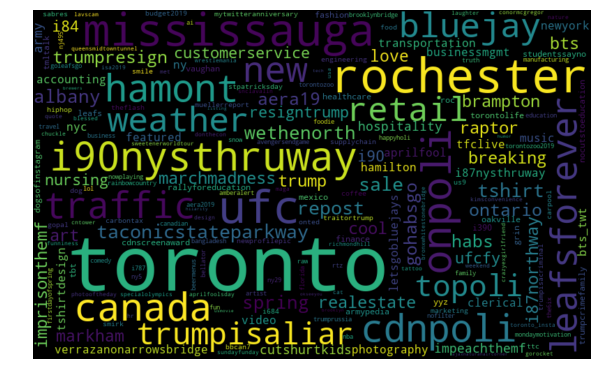

In [108]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()